# Módulo **Simpy**

Este módulo de Python nos permite hacer cálculos simbólicos. La documentación completa está disponible en [https://www.sympy.org/en/index.html](https://www.sympy.org/en/index.html).

Entendemos por Cómputo Simbólico a la interpretación y manipulación de expresiones matemáticas mediante una computadora en lugar de utilizar evaluaciones numéricas.

Existen alternativas como Maple, Wolfram Mathematica, Sage, entre otras. La ventaja de simpy sobre éstas es, principalmente, que si tenemos conocimientos de Python no requerimos aprender otro lenguaje y que no requiere adquirir una licencia.


Comenzaremos por instalar el módulo

In [2]:
!pip install sympy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Además de importar el módulo, lo primero que debemos hacer es *declarar* qué caracteres utilizaremos como variable simbólicas.

Veamos cómo hacer esto:

In [3]:
import sympy as sp 

x, y = sp.symbols('x y')

En la celda anterior declaramos a **x** y **y** como variables simbólicas, veamos algunas diferencias respecto el cálculo numérico:

In [4]:
x*x+y

x**2 + y

Veamos qué pasa si utilizamos otra letra que no hayamos declarado como variable simbólica, por ejemplo **a**:

In [5]:
x**2+a-y

NameError: ignored

Agreguemos **a** a las variables simbólicas:

In [6]:
a=sp.symbols('a')
x**2+a-y

a + x**2 - y

### Cálculo

Veamos cómo utilizar sympy en algunos ejercicios estándar de Cálculo (limites, derivadas, integrales)

In [9]:
sp.limit(a+sp.sin(x)/x, x, 0)

a + 1

Algunas funciones en Sympy tienen dos variantes: una que hace directamente el cálculo, y otra con la que podemos escribir las expresiones sin hacer el cálculo:

In [11]:
expr = sp.Limit(a+sp.sin(x)/x, x, 0)
expr

Limit(a + sin(x)/x, x, 0)

In [12]:
expr.doit()

a + 1

En este último ejemplo, notemos que es posible utilizar variables (a la que hemos llamado *expr*) para guardar expresiones simbólicas.

#### Derivadas

Pdemos calcular derivadas y derivadas de varios órdenes:

In [16]:
sp.diff(sp.tan(x), x)

tan(x)**2 + 1

In [17]:
sp.diff(sp.tan(x), x,4)

8*(tan(x)**2 + 1)*(3*tan(x)**2 + 2)*tan(x)

De forma similar al límite, *diff* tiene una contraparte que no calcula explícitamente la derivada.

In [18]:
expr=sp.tan(x)
deriv = sp.Derivative(expr, x, 4)

In [19]:
deriv

Derivative(tan(x), (x, 4))

In [20]:
deriv.doit()

8*(tan(x)**2 + 1)*(3*tan(x)**2 + 2)*tan(x)

Veamos otra manera de escribir derivadas.


In [32]:
expr=sp.tan(x)
x,n=sp.symbols('x n')
deriv = expr.diff((x, n))
deriv

Derivative(tan(x), (x, n))

#### Integrales

In [33]:
sp.integrate(sp.tan(x), x)

-log(cos(x))

In [39]:
sp.integrate(sp.exp(-x**2), (x, -sp.oo, sp.oo))

sqrt(pi)

**Nota:** En los límites de integración del ejemplo anterior, aparece la expresión `sp.oo`, ésta se refiere a $\infty$.

In [48]:
expr=sp.Integral(sp.exp(-x**2),(x, -sp.oo, sp.oo))
expr

Integral(exp(-x**2), (x, -oo, oo))

In [49]:
expr.doit()

sqrt(pi)

#### Series de Taylor

In [51]:
expr=sp.cos(x)
expr.series(x, 0, 8)

1 - x**2/2 + x**4/24 - x**6/720 + O(x**8)

#### Ecuaciones diferenciales

In [57]:
u = sp.symbols('u', cls=sp.Function)
x = sp.symbols('x')

eq=sp.Eq(u(x).diff(x, 2) - u(x).diff(x) , 2*x)

In [58]:
eq

Eq(-Derivative(u(x), x) + Derivative(u(x), (x, 2)), 2*x)

In [59]:
sp.dsolve(eq, u(x))

Eq(u(x), C1 + C2*exp(x) - x**2 - 2*x)

## *Simplify*, *Factor*  $\&$ *Expand*

Es posible que expresiones muy complicadas tengan más de una manera de simplificarse. Veremos ahora dos funciones de Sympy, comunes además en otros software de cálculo simbólico, que debemos tener presentes cuando queremos desplegar expresiones simbólicas.

Consideremos el siguiente ejemplo

In [63]:
x,a=sp.symbols('x a')
polinomio=(3*x**2-a)**4

In [64]:
polinomio

(-a + 3*x**2)**4

Aunque la anterior es una expresión bastante simple, quizás nuestro interés en usar un módulo como sympy era realizar el calculo explícito. Veamos cómo podemos forzar el desarrollo explícitamente:

In [65]:
sp.expand(polinomio)

a**4 - 12*a**3*x**2 + 54*a**2*x**4 - 108*a*x**6 + 81*x**8

Por otra parte, también es posible que después de realizar muchos cálculos terminemos con una expresión demasiado complicada y deseemos verificar si es posible simplificarla:

In [71]:
expr=-4*x**2*y*(x*y)**(3/2) + 12*x**2*(x*y)**(3/2) + 4*x*y*(x*y)**(3/2) - 12*x*(x*y)**(3/2) - y*(x*y)**(3/2) + 3*(x*y)**(3/2)
expr

-4*x**2*y*(x*y)**1.5 + 12*x**2*(x*y)**1.5 + 4*x*y*(x*y)**1.5 - 12*x*(x*y)**1.5 - y*(x*y)**1.5 + 3*(x*y)**1.5

In [72]:
sp.simplify(expr)

(x*y)**1.5*(-4*x**2*y + 12*x**2 + 4*x*y - 12*x - y + 3)

Sin embargo, el resultado está lejos de su expresión más simple. Sin embargo, es posible que podemos obtenerla con *factor*

In [73]:
sp.factor(expr)

-(x*y)**1.5*(2*x - 1)**2*(y - 3)

### Sistemas Coordenados

También podemos hacer cálculo simbólicos en el espacio o en el plano con diferentes sistemas coordenados:

In [79]:
from sympy.vector import CoordSys3D

# Representemos por ejemplo la base estandar en el espacio
e = CoordSys3D('e')  
# y definamos una función vectorial
f=sp.sin(x)*e.i+2*e.j+x*e.k

In [80]:
# veamos como se ve la funcion que acabamos de definir
f

(sin(x))*e.i + 2*e.j + x*e.k

In [88]:
# calculemos la norma de nuestra funcion f
expr=sp.vector.Dot(f,f)
sp.simplify(expr)


x**2 + sin(x)**2 + 4

In [90]:
# tambien tenemos otras funciones como el producto cruz
sp.vector.cross(f,e.i+e.j)

(-x)*e.i + x*e.j + (sin(x) - 2)*e.k

Veamos como utilizar coordenadas espericas

In [105]:
S = CoordSys3D('S', transformation='spherical')

Veamos cómo calcular un Jacobiano

In [126]:

from sympy.abc import rho, phi
# F(rho, phi)= (rho*cos(x), rho*sin(x))

F = sp.Matrix([rho*sp.cos(phi), rho*sp.sin(phi)])
X = sp.Matrix([rho, phi])
J=F.jacobian(X)
J



Matrix([
[cos(phi), -rho*sin(phi)],
[sin(phi),  rho*cos(phi)]])

## Función *lambda*

Es posible que después de hacer un cálculo simbólico evaluar la expresión para obtener un valor numérico. Para lograrlo necesitamos convertir la expresión que queramos evaluar a una función como las que definimos en la unidad anterior, a esta operación la llamaremos *lambidifcar* (lambdify).

Veamos cómo funciona

In [131]:
x,a=sp.symbols('x a')
polinomio=(3*x**2-6)**4

In [132]:
funcion=sp.lambdify(x,polinomio)

evaluemos la función polinomio en x=1

In [133]:
funcion(1)

81

Combinemos lo anterior con matplotlib para graficar la función *polinomio*

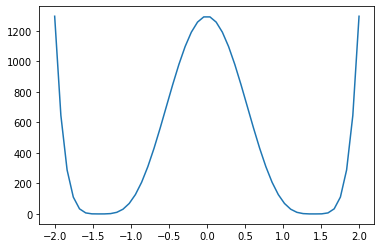

In [134]:
import matplotlib.pyplot as plt
import numpy as np

n=50
t=np.linspace(-2,2,n)

vals=[]
for i in range(n):
  vals.append(funcion(t[i]))

plt.plot(t,vals,'-')

plt.show()

# Otros módulos de Cálculo simbólico

Existen otros módulos de Cálculo simbólico, algunas más especializadas es ciertos cálculos. En particular, veremos como usar **gAlgebra** cuya documentación puede consultarse en [https://galgebra.readthedocs.io/en/latest/](https://galgebra.readthedocs.io/en/latest/).

In [1]:
!pip install galgebra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


En este módulo es más cómodo especificar *métricas* y definir campos.

No profundizaremos más en este módulo.

In [22]:
import sympy as sp
from galgebra.ga import Ga


xyz = (x, y, z) = sp.symbols('x y z', real=True)
E3d = Ga('e_x e_y e_z', g=[1, 1, 1], coords=xyz)

V=E3d.mv('V', 'vector')
